# Description

Consider the following setup consisting of a parallelogram with a linear absorption coefficient of $μ = 0.1 cm^{-1}$. At point A, there is a homogeneous sphere with $μ_1 = 0.15 cm^{-1}$ and a radius $R_1 = 25 mm$. At point B, there is another homogeneous sphere with $μ_2 = 0.05 cm^{-1}$ and a radius $R_2​ = 12 mm$. The setup is irradiated with X-rays, as shown in the diagram.

![Diagram](diagram.png)

* Pixel Size: Assume a pixel size of 1 mm × 1 mm.

* Task: Construct the generated radiograph in the following cases:

    A) Case 1:
For every $1 mm^{2}$, 1000 X-ray photons are incident.

    B) Case 2:
For every $1 mm^{2}$, 100 X-ray photons are incident.

Additional Consideration:
Repeat the construction of the radiographic image, taking into account Poisson noise.

# Import Libraries


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Initialize Spheres and Parallelogram


In [2]:
# Sphere A
m1 = 0.15  # cm^-1
R1 = 25  # mm

# Sphere B
m2 = 0.05  # cm^-1
R2 = 12  # mm

# Parallelogram
m = 0.1  # cm^-1
w = 256  # mm ---> x
h = 256  # mm ---> y
d = 128  # mm ---> z

# Create grids using ndgrid
X, Y, Z = np.ogrid[1:w + 1, 1:h + 1, 1:d + 1]

# Calculate distances for each sphere (from their center)
distanceA = np.sqrt((X - 96)**2 + (Y - 128)**2 + (Z - 64)**2)
distanceB = np.sqrt((X - 180)**2 + (Y - 128)**2 + (Z - 64)**2)

# Attenuation coefficient


In [3]:
# Create array M to store attenuation coefficient.
M = m * np.ones((w, h, d))  # initialize M to the attenuation coefficient of the parallelogram
M[distanceA <= R1] = m1  # if distanceA <= R1 == True: m1 is stored.
M[distanceB <= R2] = m2  # if distanceB <= R2 == True: m2 is stored.
# Else, the values of m don't change

# Tasks

For these tasks we use the exponential attenuation law:

$$I = I_0 e^{-\mu d}$$

Where:

* $I$ is the transmitted intensity,
* $I_0$ is the incident intensity,
* $\mu$ is the absorption coefficient, and
* $d$ is the thickness of the material.

## A) For every $1 mm^{2}$, 1000 X-ray photons are incident.


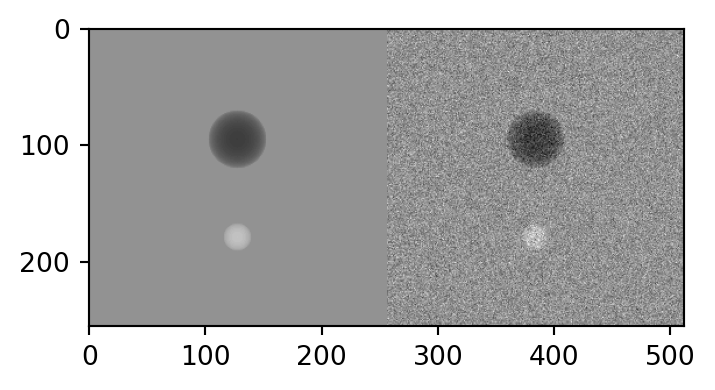

In [4]:
IoA = 1000 
IdA = IoA * np.exp(-np.sum(M, axis=2) * 0.1) 
noiseA = np.random.poisson(IdA)
plt.figure()
plt.imshow(np.hstack([IdA, noiseA]), cmap='gray')
plt.show()

## B) For every $1 mm^{2}$, 100 X-ray photons are incident.


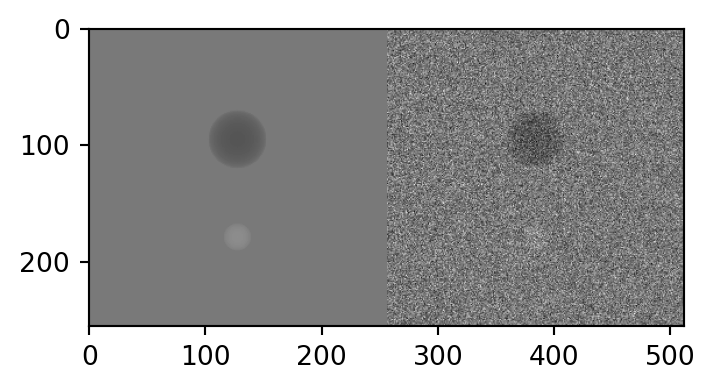

In [5]:
IoB = 100 
IdB = IoB * np.exp(-np.sum(M, axis=2) * 0.1)
noiseB = np.random.poisson(IdB)
plt.figure()
plt.imshow(np.hstack([IdB, noiseB]), cmap='gray')
plt.show()

# Matlab


In [6]:
import matlab.engine

# Start MATLAB Engine
eng = matlab.engine.start_matlab()

# MATLAB Code
matlab_code = """
% Sphere A
m1 = 0.15; % cm^-1
R1 = 25; % mm

% Sphere B
m2 = 0.05; % cm^-1
R2 = 12; % mm

% Parallelogram
m = 0.1; % cm^-1
w = 256; % mm ---> x
h = 256; % mm ---> y
d = 128; % mm ---> z

% Create grids using ndgrid
[X, Y, Z] = ndgrid(1:w, 1:h, 1:d);

% Calculate distances for each sphere (from their center)
distanceA = sqrt((X - 96).^2 + (Y - 128).^2 + (Z - 64).^2);
distanceB = sqrt((X - 180).^2 + (Y - 128).^2 + (Z - 64).^2);

% Create matrix M to store attenuation coefficient.
M = m * ones(w, h, d); % initialize M to the atteniation coefficient of the parallelogram
M(distanceA <= R1) = m1; % if distanceA <= R1 == true : m1 is stored.
M(distanceB <= R2) = m2; % if distanceB <= R2 == true : m2 is stored.
% Else, the values of m don't change

% Case A (1000 photons per mm^2)
IoA= 1000; 
IdA = IoA * exp(-sum(M, 3) * 0.1); %instead of using 2 "for" loops, using sum(M,3) sums all the m's of the third dimention (d), returning a 2d array (w,h)
noiseA = poissrnd(IdA);
figure;
imshow([IdA, noiseA],[]);
% Save the figure as an image
saveas(gcf, 'caseA_figure.png');

% Case B (100 photons per mm^2)
IoB = 100; 
IdB = IoB * exp(-sum(M, 3) * 0.1);
noiseB = poissrnd(IdB);
figure;
imshow([IdB, noiseB],[]);
% Save the figure as an image
saveas(gcf, 'caseB_figure.png');
"""

# Execute MATLAB Code
eng.eval(matlab_code, nargout=0)

# Stop MATLAB Engine
eng.quit()

## Matlab Results

![Case A](caseA_figure.png)

![Case B](caseB_figure.png)